# Exploratory Data Analysis Notebook

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from ucimlrepo import fetch_ucirepo

## Importing Dataset

In [2]:
data = fetch_ucirepo(id=863)

In [3]:
print(data.variables)

          name     role         type demographic  \
0          Age  Feature      Integer         Age   
1   SystolicBP  Feature      Integer        None   
2  DiastolicBP  Feature      Integer        None   
3           BS  Feature      Integer        None   
4     BodyTemp  Feature      Integer        None   
5    HeartRate  Feature      Integer        None   
6    RiskLevel   Target  Categorical        None   

                                         description   units missing_values  
0    Any ages in years when a women during pregnant.    None             no  
1  Upper value of Blood Pressure in mmHg, another...    None             no  
2  Lower value of Blood Pressure in mmHg, another...    None             no  
3  Blood glucose levels is in terms of a molar co...  mmol/L             no  
4                                               None       F             no  
5                        A normal resting heart rate     bpm             no  
6  Predicted Risk Intensity Level dur

In [4]:
X = data.data.features
y = data.data.targets
print(X.head())
print(y.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76
   RiskLevel
0  high risk
1  high risk
2  high risk
3  high risk
4   low risk


In [5]:
data = pd.concat([X,y],axis=1)
data.sample(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
608,35,100,70,7.5,98.0,66,low risk
27,22,100,65,7.2,98.0,70,low risk
529,23,120,75,8.0,98.0,70,mid risk
687,17,110,75,12.0,101.0,76,high risk
293,23,120,80,7.7,98.0,70,low risk
924,42,120,80,7.5,98.0,70,low risk
919,19,90,70,7.5,98.0,80,low risk
661,15,70,50,6.0,98.0,70,mid risk
764,28,120,90,6.9,98.0,70,mid risk
869,29,90,70,6.7,98.0,80,mid risk


In [6]:
data.rename(columns={'BS':'BloodSugar'}, inplace=True)

## Describing Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BloodSugar   1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BloodSugar     0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
data.describe()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [10]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [11]:
data['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [12]:
data['RiskLevel'].value_counts(normalize=True)

RiskLevel
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64

## Analyzing & Visualizing Dataset

### Univariate Analysis

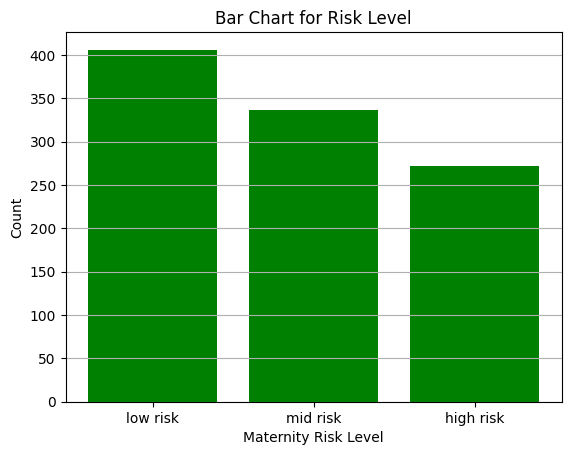

In [13]:
risk_counts = data['RiskLevel'].value_counts()
plt.grid(axis='y')
plt.bar(risk_counts.index, risk_counts.values, color='green')
plt.xlabel("Maternity Risk Level")
plt.ylabel("Count")
plt.title("Bar Chart for Risk Level")
plt.show()

Majority of the instances in this dataset are of women whose health is at at low risk, followed by those at medium risk, and lastly at high risk.

In [14]:
numeric_cols = list(data.select_dtypes(exclude='object').columns)
numeric_cols

['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']

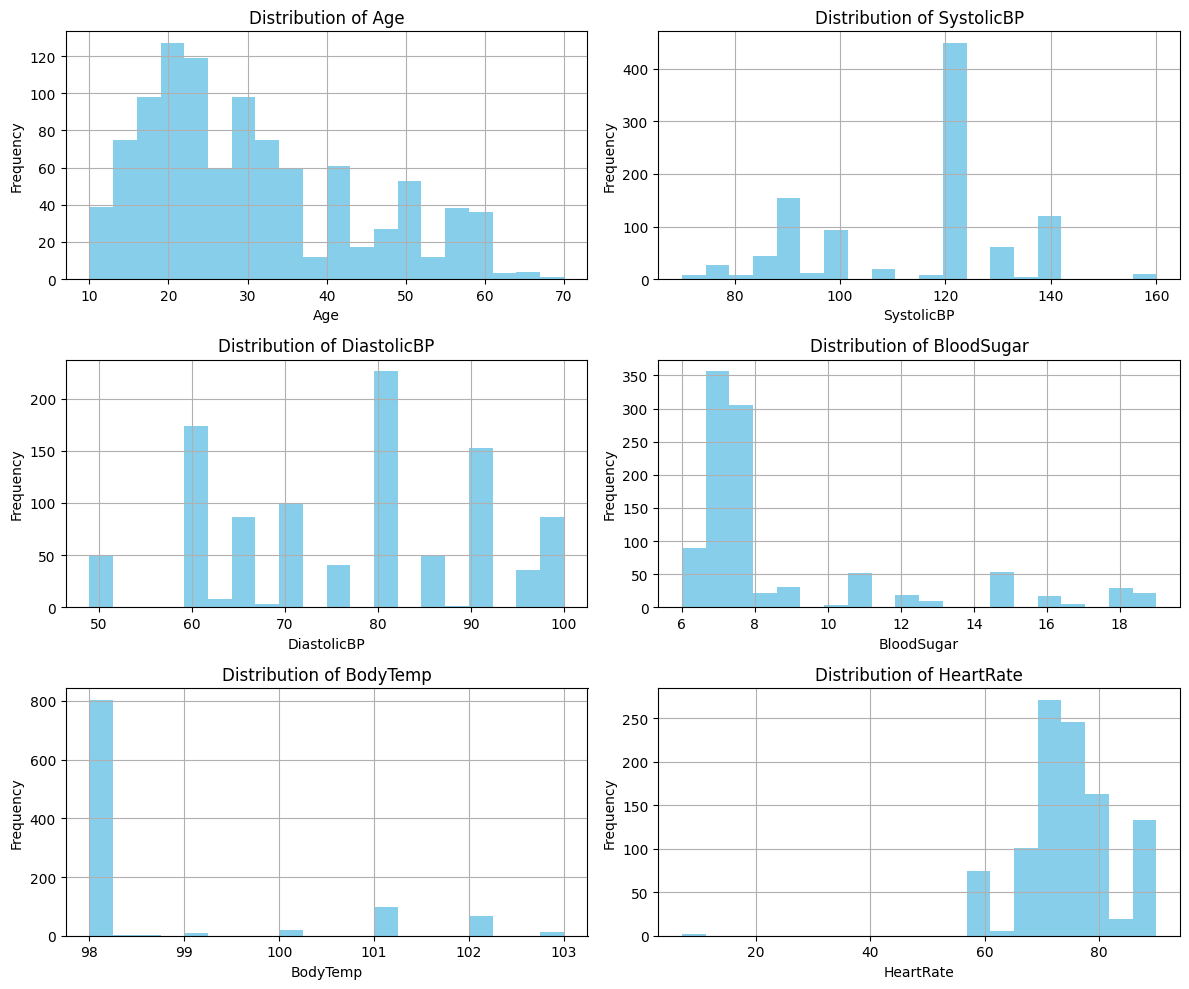

In [15]:
fig, axes = plt.subplots(3,2, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col], bins=20, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

1. Age is one of the features that takes a wide range of values, giving it the resemblance of a normal distribution that is positively skewed. The skewness indicates that majority of the women recorded belong to the younger population. Most are under 50, which is valid as pregnancy by age 50 and above is uncharacteristic. Quite shockingly this dataset consists of records of pregnant women starting from age 10. The highest peaks occur between age 16 and 25. 
2. SystolicBP, DiastolicBP, and BodyTemp take only a few unique values, and the values of highest frequency are 120, 80, and 98, respectively, which are the normal values. Only around 250 women have normal diastolic blood pressure, 40-45% have a normal systolic BP, and nearly 80% have normal body temperature. Hence, it appears that DiastolicBP captures most variations in the women's health, followed by systolicBP.
3. Majority of the blood sugar measurements lie between 6 and 8. Since, the data description doesn't specify whether or not the blood sugar was tested in fasting, we can assume these are random blood glucose measurements, in which case less than 11 mmol/L is considered non-diabetic. Hence, more than 70% of the women do not seem to have diabetes, while the remaining do at different levels of criticality.
4. HeartRate also has a near normal distribution, with a some outliers. The peak is at 70-72 which is the normal value for heart rate.

### Bivariate Analysis

### Multivariate Analysis

### Outlier Detection